In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
#Can this be used to say something about strucutre?
#i.e. are disordered proteins more random?

In [34]:
hs_oprm1 = 'MDSSAAPTNASNCTDALAYSSCSPAPSPGSWVNLSHLDGNLSDPCGPNRTDLGGRDSLCPPTGSPSMITAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIINVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALVTIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSNIEQQNSTRIRQNTRDHPSTANTVDRTNHQLENLEAETAPLP'
hs_dhcr7 = 'MAAKSQPNIPKAKSLDGVTNDRTASQGQWGRAWEVDWFSLASVIFLLLFAPFIVYYFIMACDQYSCALTGPVVDIVTGHARLSDIWAKTPPITRKAAQLYTLWVTFQVLLYTSLPDFCHKFLPGYVGGIQEGAVTPAGVVNKYQINGLQAWLLTHLLWFANAHLLSWFSPTIIFDNWIPLLWCANILGYAVSTFAMVKGYFFPTSARDCKFTGNFFYNYMMGIEFNPRIGKWFDFKLFFNGRPGIVAWTLINLSFAAKQRELHSHVTNAMVLVNVLQAIYVIDFFWNETWYLKTIDICHDHFGWYLGWGDCVWLPYLYTLQGLYLVYHPVQLSTPHAVGVLLLGLVGYYIFRVANHQKDLFRRTDGRCLIWGRKPKVIECSYTSADGQRHHSKLLVSGFWGVARHFNYVGDLMGSLAYCLACGGGHLLPYFYIIYMAILLTHRCLRDEHRCASKYGRDWERYTAAVPYRLLPGIF'
dr_oprm1 = 'MMENTGNISDLLYALSNPMVSNSSIFCRNFSNSSGLVNMNSSVCDRTPELDKSSTPVIVAIIITALYSIVCVMGLVGNVLVMYVIIRYTKMKTATNIYIFNLALADSLATSTLPFQSVNYLMGTWPFGDELCKIVMSIDYYNMFTSIFTLTTMSVDRYIAVCHPVKALDFRTPRNAKIVNVCNWILSSAIGLPVMVMASTTSDLHSNGIIDCTLLFPHPSWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIFVIIKALVTIPNSLLQTITWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCVPSPSVLDLQNSTRSRNPQRDGQSSGHTVDRTNQQV'
rn_oprm1 = 'MDSSTGPGNTSDCSDPLAQASCSPAPGSWLNLSHVDGNQSDPCGLNRTGLGGNDSLCPQTGSPSMVTAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIVNVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALITIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSTIEQQNSTRVRQNTREHPSTANTVDRTNHQLENLEAETAPLP'
hs_mltr1a = 'MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVADLVVAIYPYPLVLMSIFNNGWNLGYLHCQVSGFLMGLSVIGSIFNITGIAINRYCYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRQRVKPDRKPKLKPQDFRNFVTMFVVFVLFAICWAPLNFIGLAVASDPASMVPRIPEWLFVASYYMAYFNSCLNAIIYGLLNQNFRKEYRRIIVSLCTARVFFVDSSNDVADRVKWKPSPLMTNNNVVKVDSV'
hs_sstr2 = 'MDMADEPLNGSHTWLSIPFDLNGSVVSTNTSNQTEPYYDLTSNAVLTFIYFVVCIIGLCGNTLVIYVILRYAKMKTITNIYILNLAIADELFMLGLPFLAMQVALVHWPFGKAICRVVMTVDGINQFTSIFCLTVMSIDRYLAVVHPIKSAKWRRPRTAKMITMAVWGVSLLVILPIMIYAGLRSNQWGRSSCTINWPGESGAWYTGFIIYTFILGFLVPLTIICLCYLFIIIKVKSSGIRVGSSKRKKSEKKVTRMVSIVVAVFIFCWLPFYIFNVSSVSMAISPTPALKGMFDFVVVLTYANSCANPILYAFLSDNFKKSFQNVLCLVKVSGTDDGERSDSKQDKSRLNETTETQRTLLNGDLQTSI'
gfp_envy = 'MSKGEELFTGVVPILVELDGDVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLCYGVQCFARYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFNSHNVYITADKQKNGIKANFKTRHNVEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYK'
hs_adora = 'MLLETQDALYVALELVIAALSVAGNVLVCAAVGTANTLQTPTNYFLVSLAAADVAVGLFAIPFAITISLGFCTDFYGCLFLACFVLVLTQSSIFSLLAVAVDRYLAICVPLRYKSLVTGTRARGVIAVLWVLAFGIGLTPFLGWNSKDSATNNCTEPWDGTTNESCCLVKCLFENVVPMSYMVYFNFFGCVLPPLLIMLVIYIKIFLVACRQLQRTELMDHSRTTLQREIHAAKSLAMIVGIFALCWLPVHAVNCVTLFQPAQGKNKPKWAMNMAILLSHANSVVNPIVYAYRNRDFRYTFHKIISRYLLCQADVKSGNGQAGVQPALGVGL'
hs_mltr1b = 'MSENGSFANCCEAGGWAVRPGWSGAGSARPSRTPRPPWVAPALSAVLIVTTAVDVVGNLLVILSVLRNRKLRNAGNLFLVSLALADLVVAFYPYPLILVAIFYDGWALGEEHCKASAFVMGLSVIGSVFNITAIAINRYCYICHSMAYHRIYRRWHTPLHICLIWLLTVVALLPNFFVGSLEYDPRIYSCTFIQTASTQYTAAVVVIHFLLPIAVVSFCYLRIWVLVLQARRKAKPESRLCLKPSDLRSFLTMFVVFVIFAICWAPLNCIGLAVAINPQEMAPQIPEGLFVTSYLLAYFNSCLNAIVYGLLNQNFRREYKRILLALWNPRHCIQDASKGSHAEGLQSPAPPIIGVQHQADAL'
hs_oprk1 = 'MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSEDAQLEPAHISPAIPVIITAVYSVVFVVGLVGNSLVMFVIIRYTKMKTATNIYIFNLALADALVTTTMPFQSTVYLMNSWPFGDVLCKIVISIDYYNMFTSIFTLTMMSVDRYIAVCHPVKALDFRTPLKAKIINICIWLLSSSVGISAIVLGGTKVREDVDVIECSLQFPDDDYSWWDLFMKICVFIFAFVIPVLIIIVCYTLMILRLKSVRLLSGSREKDRNLRRITRLVLVVVAVFVVCWTPIHIFILVEALGSTSHSTAALSSYYFCIALGYTNSSLNPILYAFLDENFKRCFRDFCFPLKMRMERQSTSRVRNTVQDPAYLRDIDGMNKPV'
rn_oprk1 = 'MESPIQIFRGEPGPTCAPSACLLPNSSSWFPNWAESDSNGSVGSEDQQLEPAHISPAIPVIITAVYSVVFVVGLVGNSLVMFVIIRYTKMKTATNIYIFNLALADALVTTTMPFQSAVYLMNSWPFGDVLCKIVISIDYYNMFTSIFTLTMMSVDRYIAVCHPVKALDFRTPLKAKIINICIWLLASSVGISAIVLGGTKVREDVDVIECSLQFPDDEYSWWDLFMKICVFVFAFVIPVLIIIVCYTLMILRLKSVRLLSGSREKDRNLRRITKLVLVVVAVFIICWTPIHIFILVEALGSTSHSTAVLSSYYFCIALGYTNSSLNPVLYAFLDENFKRCFRDFCFPIKMRMERQSTNRVRNTVQDPASMRDVGGMNKPV'
mm_oprm1 = 'MDSSAGPGNISDCSDPLAPASCSPAPGSWLNLSHVDGNQSDPCGPNRTGLGGSHSLCPQTGSPSMVTAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGNILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIVNVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALITIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSTIEQQNSARIRQNTREHPSTANTVDRTNHQLENLEAETAPLP'
vu_oprm1 = 'MDSSTFPANSSGCSDAFSLTSSCSPTPPSGAWMNLSRLDGNLSDPCSGPNRTDLGVGGGSPCPPTGSPSMVTAITIMALYSIVCVVGLFGNFLVMYVIIRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIVNVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALVTIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSTIEQQNSTRIRQNTRDHPSTANTVDRTNHQV'
cons_rn_oprm1 = 'MSDAAPSLSNLFYDPTYDCSDPLAQASCSPAPGSWLNLSHVDGNQSDPCGLNRTGLGGNDSLCPQTGSPSMVTAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVQRYIAVCHPVKALDFRTPRNAKIVNVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALITIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSTIEQQNSTRVRQNTREHPSTANTVDRTNHQLENLEAETAPLP'
#vu is wombat
p53 = 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'

In [77]:
filename  = 'p53 Missense data.csv'
variants = []
labels = []
with open(filename) as file:
    reader = csv.reader(file)
    
    for row in reader:
        variants.append(row[0])
        labels.append(row[1])


In [78]:
for i in range(len(variants)):
    variants[i] = get_variant_sequence(p53, variants[i])
    

2854

In [75]:
#Defines (x,y) vertices coordinates
# sides corresponds to number of points e.g. square == 4
def calculate_vertices(sides, center = (0,0)):
    i = 1
    vertices = []
    while (i * 360/sides) <= 360:
        vertices.append((round((center[0] + math.sin(math.radians(i * 360/sides))),4), round((center[1] + math.cos(math.radians(i * 360/sides))),4)))
        i += 1

    return vertices

def get_variant_sequence(protein_seq, mutation):
    mutation = list(mutation)
    result = protein_seq[0:(int(''.join( mutation[1: len(mutation)-1])) - 1)] + mutation[-1] + protein_seq[int(mutation[1]):]
    return result

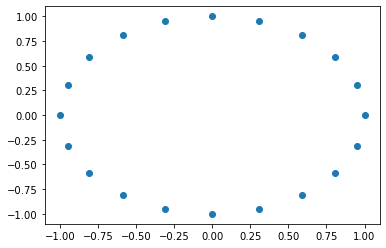

In [153]:
test_list = calculate_vertices(20)
res = [[ i for i, j in test_list ], 
       [ j for i, j in test_list ]] 
plt.scatter(res[0], res[1])
plt.show()

In [56]:
def generate_cgr(protein_seq, distance_matrix = None, vertices_labels = g_distance_index, step = 0.5):
    
    assert step <= 1, "Step size too large, will over shoot vertex "
    protein_seq = protein_seq.strip('*').upper() # format input to remove termination factor and convert to uppercase
    
    mapped_vertices = {}
       
  
    cat = vertices_labels
        
        
    vertices = calculate_vertices(len(cat))
    for i in range(len(vertices)):
        for j in cat[i]:
            
            mapped_vertices[j] = vertices[i]
    
    stack = [(0,0)]
    prev_AA = 'M'
    
    for i in protein_seq:
        
        destination = np.array(mapped_vertices[i])
        current_position = np.array(stack[-1])
        
        if distance_matrix == 'kim':
                next_position = (destination - current_position)*(step + get_AA_distance(prev_AA, i, k_distance_matrix, k_distance_index)) + current_position

        else:
            next_position = (destination - current_position)*(step * 1/np.sqrt(get_AA_distance(prev_AA, i, g_distance_matrix, g_distance_index))) + current_position
        prev_AA = i
                                                          
        stack.append((next_position[0], next_position[1]))
        
    return stack, cat


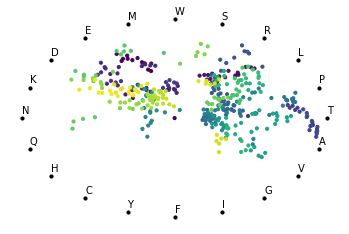

In [87]:

stack, cat = generate_cgr(p53, distance_matrix = 'None', step = 0.5)
stack = np.array(stack)
colors = (np.array( range( len(stack)))/ len(stack)) * 100 # Creates an array of values [0...100] to be passed to cmap, values are normalized to sequence length than scaled to 0-100

plt.scatter(stack[:,0], stack[:,1], s = 10, c = colors, cmap = 'viridis')
plt.axis('off')

vertices = np.array(calculate_vertices(len(cat)))
plt.scatter(vertices[:,0], vertices[:,1], color = 'k', s = 10)

fig1 = plt.gcf()

for i in range(len(vertices)):
    plt.annotate(cat[i], vertices[i] + [0, 0.05])

fig1.savefig('p53_wt', dpi = 300, bbox_inches='tight')
plt.show()

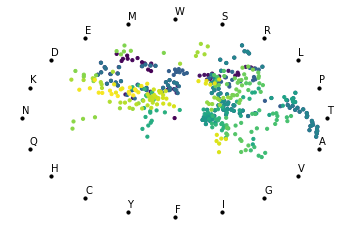

In [88]:
stack, cat = generate_cgr(variants[-1], distance_matrix = 'None', step = 0.5)
stack = np.array(stack)
colors = (np.array( range( len(stack)))/ len(stack)) * 100 # Creates an array of values [0...100] to be passed to cmap, values are normalized to sequence length than scaled to 0-100

plt.scatter(stack[:,0], stack[:,1], s = 10, c = colors, cmap = 'viridis')
plt.axis('off')

vertices = np.array(calculate_vertices(len(cat)))
plt.scatter(vertices[:,0], vertices[:,1], color = 'k', s = 10)

fig2 = plt.gcf()

for i in range(len(vertices)):
    plt.annotate(cat[i], vertices[i] + [0, 0.05])

#fig.savefig('oprm1', dpi = 300, bbox_inches='tight')

plt.show()

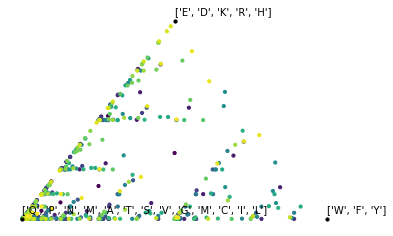

In [129]:
def generate_cgr_dstep(protein_seq):
    
    assert step <= 1, "Step size too large, will over shoot vertex "
    
    
    mapped_vertices = {}
    
    
    

    cat = ['F', 'L', 'I', 'M', 'V', 'S', 'P', 'T', 'A', 'Y', 'H', 'Q', 'N', 'K', 'D', 'E', 'C', 'W', 'R', 'G' ]
        
        
    vertices = calculate_vertices(len(cat))
    for i in range(len(vertices)):
        for j in cat[i]:
            
            mapped_vertices[j] = vertices[i]
    
    stack = [(0,0)]
    
    for i in protein_seq:
        
        destination = np.array(mapped_vertices[i])
        current_position = np.array(stack[-1])
        
        next_position = (current_position + destination)*step
        
        stack.append((next_position[0], next_position[1]))
        
    return stack, cat


In [151]:
fig1.savefig('Rattus n Mu opioid recpetor', dpi = 300, bbox_inches='tight' )
fig2.savefig('Homo s Mu opioid recpetor', dpi = 300, bbox_inches='tight' )

[ 20.  30.  40.  50.  60.  70.  80.  90. 100. 110.]


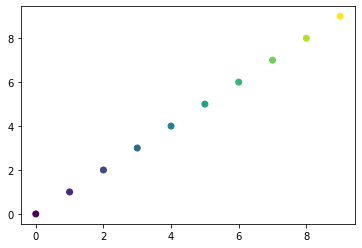

In [134]:
a = np.array(range(10))
colors = (np.array( range( len(a)))/ len(a)) * 100 +20 # Creates an array of values [0...100] to be passed to cmap, values are normalized to sequence length than scaled to 0-100
print(colors)
plt.scatter(a,a, c = colors ,cmap = 'viridis')
plt.show()

In [54]:
g_distance_index = ['S','R', 'L', 'P', 'T', 'A', 'V', 'G', 'I', 'F', 'Y', 'C', 'H', 'Q', 'N', 'K', 'D', 'E', 'M', 'W'] #Add serine d/max distance
g_distance_matrix = np.array([[1, 110, 145, 74, 58, 99, 124, 56, 142, 155, 144, 112, 89, 68, 46, 121, 65, 80, 135, 177],
                            [None, 1, 102, 103, 71, 112, 96, 125, 97, 97, 77, 180, 29, 43, 86, 26, 96, 54, 91, 101],
                            [None, None, 1, 98, 92, 96, 32, 138, 5, 22, 36, 198, 99, 113, 153, 107, 172, 138, 15, 61],
                            [None, None, None, 1, 38, 27, 68, 42, 95, 114, 110, 169, 77, 76, 91, 103, 108, 93, 87, 147],
                            [None, None, None, None, 1, 58, 69, 59, 89, 103, 92, 149, 47, 42, 65, 78, 85, 65, 81, 128],
                            [None, None, None, None, None, 1, 64, 60, 94, 113, 112, 195, 86, 91, 111, 106, 126, 107, 84, 148],
                            [None, None, None, None, None, None, 1, 109, 29, 50, 55, 192, 84, 96, 133, 97, 152, 121, 21, 88],
                            [None, None, None, None, None, None, None, 1, 135, 153, 147, 159, 98, 87, 80, 127, 94, 98, 127, 184],
                            [None, None, None, None, None, None, None, None, 1, 21, 33, 198, 94, 109, 149, 102, 168, 134, 10, 61],
                            [None, None, None, None, None, None, None, None, None, 1, 22, 205, 100, 116, 158, 102, 177, 140, 28, 40],
                            [None, None, None, None, None, None, None, None, None, None, 1, 194, 83, 99, 143, 85, 160, 122, 36, 37],
                            [None, None, None, None, None, None, None, None, None, None, None, 1, 174, 154, 139, 202, 154, 170, 196, 215],
                            [None, None, None, None, None, None, None, None, None, None, None, None, 1, 24, 68, 32, 81, 40, 87, 115],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 46, 53, 61, 29, 101,130],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 94, 23, 42, 142, 174],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 101, 56, 95, 110],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 45, 160, 181],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 126, 152],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1, 67],
                            [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1]])


k_distance_index = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
k_distance_matrix = np.array([[0.322860152036, 0.0113750373506, -0.0156239175966, -0.00259952715456, -0.0508792185716, 0.0382679273874, -0.0832539299638, -0.00196691041626, -0.0103729638696, -0.042393907322, -0.0651042403697, -0.0853704925231, 0.0757409633086, -0.0483151514798, -0.0136431408498, 0.038455041596, 0.0520376087986, 0.081101427454, -0.125564718844, -0.0747500389698], 
                                [0.0113750373506, 0.100680270274, 0.0102951033136, 0.0147570340938, 0.0345785831581, 0.00933463557214, -0.00750101609651, 0.00476007239717, -0.0459237939975, -0.0182998264075, -0.0155971113182, 0.0021128481374, -0.00860770840682, -0.0309903425175, -0.0482562439545, -0.0217965163697, -0.0227322740574, -0.0154276574266, 0.0412325888637, 0.00600631739163], 
                                [-0.0156239175966, 0.0102951033136, 0.157208255034, 0.0724279735923, -0.0189545540921, -0.00870389879389, -0.0180188107498, -0.0283467966687, -0.0634240071162, -0.0279979457557, -0.0241192288182, 0.0194310374127, 0.042784078891, 0.000437307476866, -0.0591268568576, -0.0104660502173, 0.00656101264316, -0.0193560886308, 0.00415097887978, -0.0191575919464], 
                                [-0.00259952715456, 0.0147570340938, 0.0724279735923, 0.131775168933, -0.00519060032543, -0.00547805492393, -0.0335600821273, -0.0135417817213, -0.069471604426, 0.00353800457557, -0.017166710134, 0.00534055417468, 0.022589833552, 0.0281404974641, -0.0697402405064, -0.0172364513778, -0.0054830504799, -0.00806269508269, -0.00791955104235, -0.0231187170833], 
                                [-0.0508792185716, 0.0345785831581, -0.0189545540921, -0.00519060032543, 0.259179996995, -0.00445131805782, -0.00639743486807, 0.0628717025094, -0.049227253611, 0.0488666377736, 0.0315353570161, -0.0223593028205, -0.0919732521492, -0.0930189756622, -0.0626297946351, -0.0868415233743, -0.0777292391855, -0.015794520965, 0.0625957490761, 0.0858189617896], 
                                [0.0382679273874, 0.00933463557214, -0.00870389879389, -0.00547805492393, -0.00445131805782, 0.122499934434, -0.025558278086, -0.0207027221208, -0.0137316756786, -0.0326424665142, -0.0264215095016, -0.00403752148352, 0.0094352664965, 0.00425299048772, -0.0232280105465, 0.0304312733191, 0.00861853592388, -0.0127217072682, -0.0246539147339, -0.0205094859119], 
                                [-0.0832539299638, -0.00750101609651, -0.0180188107498, -0.0335600821273, -0.00639743486807, -0.025558278086, 0.207657765989, -0.0888505073496, 0.0761447053198, -0.0351727012494, -0.000760393877348, 0.0353903619255, -0.0682087048807, -0.00886454093107, 0.109052662874, 0.00938179429131, -0.0234122309305, -0.0870188771708, 0.0123622841944, 0.0365879336865], 
                                [-0.00196691041626, 0.00476007239717, -0.0283467966687, -0.0135417817213, 0.0628717025094, -0.0207027221208, -0.0888505073496, 0.27773187827, -0.0381642025534, 0.0886112938313, 0.0551293441776, -0.0593694184462, -0.039207153398, -0.0626883806129, -0.110160438997, -0.0618078497671, -0.0339233811197, 0.091300054417, 0.00138488610169, -0.0230596885329], 
                                [-0.0103729638696, -0.0459237939975, -0.0634240071162, -0.069471604426, -0.049227253611, -0.0137316756786, 0.0761447053198, -0.0381642025534, 0.273355694189, -0.0177282663533, -0.00817300753785, -0.0339854863013, -0.0484016323395, -0.0331603641198, 0.21516548555, 0.00476731287861, -0.0331318604828, -0.0400367780545, -0.0598522551401, -0.00464804635586], 
                                [-0.042393907322, -0.0182998264075, -0.0279979457557, 0.00353800457557, 0.0488666377736, -0.0326424665142, -0.0351727012494, 0.0886112938313, -0.0177282663533, 0.162738321535, 0.0750528874999, -0.0111666419731, -0.051023845781, -0.00134001844501, -0.074934598492, -0.0584956357369, -0.031311528799, 0.0449678806271, -0.00754567267671, -0.0137219703366], 
                                [-0.0651042403697, -0.0155971113182, -0.0241192288182, -0.017166710134, 0.0315353570161, -0.0264215095016, -0.000760393877348, 0.0551293441776, -0.00817300753785, 0.0750528874999, 0.156957428383, 0.00753829785887, -0.091647674076, 0.00190198496329, -0.0257018542091, -0.0295349216339, -0.0454820084051, -0.0120310888206, 0.0210041287765, 0.0126203200265], 
                                [-0.0853704925231, 0.0021128481374, 0.0194310374127, 0.00534055417468, -0.0223593028205, -0.00403752148352, 0.0353903619255, -0.0593694184462, -0.0339854863013, -0.0111666419731, 0.00753829785887, 0.151487423988, -0.0106077901881, 0.0413965183445, -0.0338327997913, 0.0170820288313, -0.00295174153884, -0.0436807942705, 0.0296409813073, -0.00205806264345], 
                                [0.0757409633086, -0.00860770840682, 0.042784078891, 0.022589833552, -0.0919732521492, 0.0094352664965, -0.0682087048807, -0.039207153398, -0.0484016323395, -0.051023845781, -0.091647674076, -0.0106077901881, 0.354629507834, 0.0481497903134, -0.0377142358446, -0.00687173098621, 0.0199181111388, 0.0225294243984, -0.0525069717881, -0.0890062760945], 
                                [-0.0483151514798, -0.0309903425175, 0.000437307476866, 0.0281404974641, -0.0930189756622, 0.00425299048772, -0.00886454093107, -0.0626883806129, -0.0331603641198, -0.00134001844501, 0.00190198496329, 0.0413965183445, 0.0481497903134, 0.177175171536, 0.00715630304762, 0.0357241930907, 0.027467611659, -0.032780800211, -0.0118972341632, -0.0487465602402], 
                                [-0.0136431408498, -0.0482562439545, -0.0591268568576, -0.0697402405064, -0.0626297946351, -0.0232280105465, 0.109052662874, -0.110160438997, 0.21516548555, -0.074934598492, -0.0257018542091, -0.0338327997913, -0.0377142358446, 0.00715630304762, 0.389022190137, 0.0204288367942, -0.0408668326839, -0.0934989556047, -0.0557627605155, 0.00827128508526], 
                                [0.038455041596, -0.0217965163697, -0.0104660502173, -0.0172364513778, -0.0868415233743, 0.0304312733191, 0.00938179429131, -0.0618078497671, 0.00476731287861, -0.0584956357369, -0.0295349216339, 0.0170820288313, -0.00687173098621, 0.0357241930907, 0.0204288367942, 0.161573840097, 0.0839261885951, -0.00816241136786, -0.0444334801409, -0.0561239385213], 
                                [0.0520376087986, -0.0227322740574, 0.00656101264316, -0.0054830504799, -0.0777292391855, 0.00861853592388, -0.0234122309305, -0.0339233811197, -0.0331318604828, -0.031311528799, -0.0454820084051, -0.00295174153884, 0.0199181111388, 0.027467611659, -0.0408668326839, 0.0839261885951, 0.142525860495, 0.0493244941272, -0.0264928932645, -0.0468623824337], 
                                [0.081101427454, -0.0154276574266, -0.0193560886308, -0.00806269508269, -0.015794520965, -0.0127217072682, -0.0870188771708, 0.091300054417, -0.0400367780545, 0.0449678806271, -0.0120310888206, -0.0436807942705, 0.0225294243984, -0.032780800211, -0.0934989556047, -0.00816241136786, 0.0493244941272, 0.172778293246, -0.0289445753682, -0.0444846240282], 
                                [-0.125564718844, 0.0412325888637, 0.00415097887978, -0.00791955104235, 0.0625957490761, -0.0246539147339, 0.0123622841944, 0.00138488610169, -0.0598522551401, -0.00754567267671, 0.0210041287765, 0.0296409813073, -0.0525069717881, -0.0118972341632, -0.0557627605155, -0.0444334801409, -0.0264928932645, -0.0289445753682, 0.194048086876, 0.0791543436022], 
                                [-0.0747500389698, 0.00600631739163, -0.0191575919464, -0.0231187170833, 0.0858189617896, -0.0205094859119, 0.0365879336865, -0.0230596885329, -0.00464804635586, -0.0137219703366, 0.0126203200265, -0.00205806264345, -0.0890062760945, -0.0487465602402, 0.00827128508526, -0.0561239385213, -0.0468623824337, -0.0444846240282, 0.0791543436022, 0.237788221516], 
                                ])




In [55]:
def get_AA_distance(AAone, AAtwo, distance_matrix, distance_index):   

    if distance_index.index(AAtwo) < distance_index.index(AAone):
        return distance_matrix.T[distance_index.index(AAone), distance_index.index(AAtwo)]
    
    else:
        return distance_matrix[distance_index.index(AAone), distance_index.index(AAtwo)]
    

In [11]:
get_AA_distance('F', 'C')

205

In [123]:
np.sqrt(get_AA_distance('F','F', kim_distance_matrix, k_distance_index))

0.5090972372690702

In [159]:
a = 'wdada*'
a.strip('*').upper()


'WDADA'

In [1]:
aa = ['W', 'F', 'Y', 'Q', 'P', 'N', 'A', 'T', 'S', 'V', 'G', 'M', 'C', 'I', 'L','E', 'D', 'K', 'R', 'H']

test = ""
for i in range(400):
    rand = np.random.randint(0,20)
    test = test + aa[rand]
    

NameError: name 'np' is not defined

ValueError: Unknown mat file type, version 54, 32

In [86]:
counter = 1
for i in variants:

    stack, cat = generate_cgr(i, distance_matrix = 'None', step = 0.5)
    stack = np.array(stack)
    colors = (np.array( range( len(stack)))/ len(stack)) * 100 # Creates an array of values [0...100] to be passed to cmap, values are normalized to sequence length than scaled to 0-100

    plt.scatter(stack[:,0], stack[:,1], s = 10, c = colors, cmap = 'viridis')
    plt.axis('off')

    vertices = np.array(calculate_vertices(len(cat)))
    plt.scatter(vertices[:,0], vertices[:,1], color = 'k', s = 10)

    fig1 = plt.gcf()

    for i in range(len(vertices)):
        plt.annotate(cat[i], vertices[i] + [0, 0.05])

    fig1.savefig('p53 variant' + str(counter), dpi = 300, bbox_inches='tight')
    fig1.clf()
    plt.clf()
    counter += 1
    


<Figure size 432x288 with 0 Axes>

In [70]:
[i for i in a[1:len(a)-1]]

['2', '2', '2']